#Practice Assignments

Q1) Use MNIST dataset. Store all the samples in X and labels in y.
 
* Split the dataset in the following ratio.
    * Training : Take the first 70% of samples from X and store them in x_train
    * Testing: Take the remaining 30% of samples from X and store them in x_test
    * Store the respective labels in y_train,y_test respectively.

The last training sample is of digit __?


In [ ]:
import numpy as np
import os
import io
import warnings
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss
from sklearn.pipeline import make_pipeline
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# from sklearn.pipeline import Pipeline, make_pipeline
# from sklearn.dummy import DummyClassifier
# from sklearn.linear_model import SGDClassifier, RidgeClassifier, LogisticRegression
# from sklearn.metrics import hinge_loss
# from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_recall_curve
# from sklearn.metrics import precision_score, recall_score, classification_report
# from sklearn.metrics import make_scorer, roc_curve, roc_auc_score, log_loss
# from sklearn.model_selection import cross_validate, cross_val_predict, GridSearchCV, RandomizedSearchCV
# from pprint import pprint

# %matplotlib inline
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# import seaborn as sns

# from scipy.stats import loguniform
# np.random.seed(42)

In [ ]:
#Ignore all warnings
def warn(*args, **kwargs):
  pass
warnings.warn = warn

In [ ]:
X_pd, y_pd = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X_pd.to_numpy()
y = y_pd.to_numpy()
X_train, X_test, y_train, y_test  = X[:49000], X[49000:], y[:49000], y[49000:]
print(y_train[-1])

6


Q2) Build a classifier that differentiates digit 6 from digit 9.
Steps to be followed
1. Collect all digit-6 (Positive class) and digit-9 (Negative class) images from x_train and stack them properly as a single datamatrix x_train_69.
2. Keep all digit-6 images from index 0 to i followed by digit-9 images from index i+1 to n (i denotes the end index of digit-6 images)
3. Similarly, collect the respective labels and store it in a variable y_train_69
4. Set the label values to 1 for positive classes and 0 for negative classes.
5. Load from sklearn.utils import shuffle
6. Shuffle the datamatrix and labels. (Set random_state value to 1729).
7. Create x_test_69 and y_test_69 by repeating the steps from 1 to 6 with required modifications.

What is the sum of all the labels in the vector y_train_69.

**Hint**:-
Use X-train, y_train as input to get  x_train_69 and y_train_69 and
X_test , y_test as input  to get  x_test_69 and y_test_69

In [ ]:
X_train_6 = X_train[y_train == '6']
y_train_6 = y_train[y_train == '6']

X_train_9 = X_train[y_train == '9']
y_train_9 = y_train[y_train == '9']
print(X_train_6.shape, X_train_9.shape)
X_train_69 = np.row_stack((X_train_6, X_train_9))
y_train_69 = np.row_stack((y_train_6.reshape(-1,1), y_train_9.reshape(-1,1)))
print(y_train_6.shape, y_train_9.shape)
print(X_train_69.shape, y_train_69.shape)
y_train_69 = np.where(y_train_69== '6', 1, 0)

(4855, 784) (4891, 784)
(4855,) (4891,)
(9746, 784) (9746, 1)


In [ ]:
from sklearn.utils import shuffle
X_train_69 = shuffle(X_train_69, random_state=1729)
y_train_69 = shuffle(y_train_69, random_state=1729)

In [ ]:
X_test_6 = X_test[y_test == '6']
y_test_6 = y_test[y_test == '6']

X_test_9 = X_test[y_test == '9']
y_test_9 = y_test[y_test == '9']
print(X_test_6.shape, X_test_9.shape)
X_test_69 = np.row_stack((X_test_6, X_test_9))
y_test_69 = np.row_stack((y_test_6.reshape(-1,1), y_test_9.reshape(-1,1)))
print(X_test_69.shape, y_test_69.shape)
y_test_69 = np.where(y_test_69== '6', 1, 0)

X_test_69 = shuffle(X_test_69, random_state=1729)
y_test_69 = shuffle(y_test_69, random_state=1729)

(2021, 784) (2067, 784)
(4088, 784) (4088, 1)


In [ ]:
print('Sum of all labels in the vector y_train_69: ', y_train_69.sum())

Sum of all labels in the vector y_train_69:  4855


Q3) What is the sum of all the labels in the vector y_test_69.

In [ ]:
print('Sum of all labels in the vector y_test_69: ', y_test_69.sum() )

Sum of all labels in the vector y_test_69:  2021


Q4) Apply StandardScaler to all the training samples in x_train_69 and store the result in another variable (say, x_train_69Tf)
* What is the mean of the zeroth sample?
* What is the mean of zeroth feature?
* What is the standard deviation of the zeroth sample?
* What is the standard deviation of the zeroth feature?

In [ ]:
scale = StandardScaler()
x_train_69Tf = scale.fit_transform(X_train_69)
print('mean of the zeroth sample: ', x_train_69Tf[0].mean())
print('mean of zeroth feature: ', x_train_69Tf[:,0].mean())
print('standard deviation of the zeroth sample: ',x_train_69Tf[0].std())
print('standard deviation of the zeroth feature: ', x_train_69Tf[:,0].std())

mean of the zeroth sample:  0.08128379559427823
mean of zeroth feature:  0.0
standard deviation of the zeroth sample:  0.7358823226037738
standard deviation of the zeroth feature:  0.0


Q5) Train the LogisticRegression model using SGDClassifier() with the following common settings.
1. No Regularization
2. random_state : 10
3. Iteration : 10

Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve decreased monotonically?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `

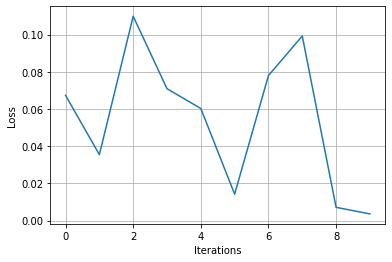

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)
loss = []
for i in range(10):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(10), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` .


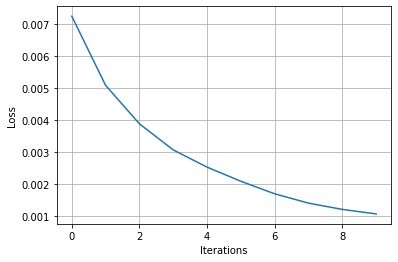

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.000001)
loss = []
for i in range(10):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(10), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples.

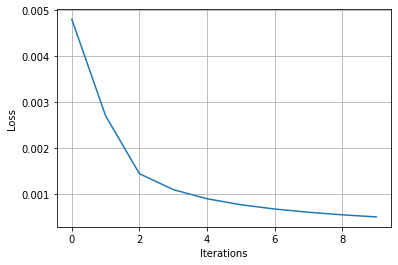

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)
scaler = StandardScaler()
pipe = make_pipeline(scaler, log_reg)
loss = []
for i in range(10):
  pipe.fit(X_train_69, y_train_69)
  y_pred = pipe.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(10), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

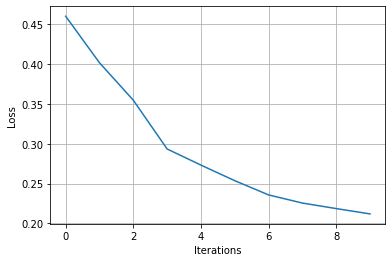

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='invscaling', eta0=0.01, power_t=1)
loss = []
for i in range(10):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

# plt.figure(figsize=(8,8))
plt.plot(np.arange(10), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

#Graded Assignments

Q1) Train the LogisticRegression model using SGDClassifier() with the following common settings.
1. No Regularization
2. random_state : 10
3. Iteration : 30   
Capture the loss for each iteration and plot the iteration vs loss curve. For which of the following settings, the iteration vs loss curve converged quickly to zero loss?

A. Set Learning rate : 0.01 and plot the curve and fit the model with `x_train_69 `.

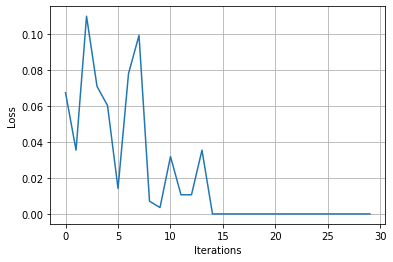

In [ ]:
log_reg = SGDClassifier(loss='log',  alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)
loss = []
iterations=30
for i in range(iterations):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

B.Set learning rate to 0.000001 and fit the model with `x_train_69 ` . 

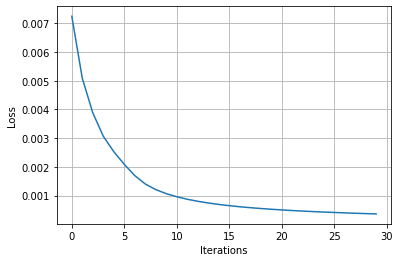

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.000001)
loss = []
iterations=30
for i in range(iterations):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

C.Keep the learning rate as 0.01. Scale the samples using StandardScaler() and fit the model with the pre-processed samples. 

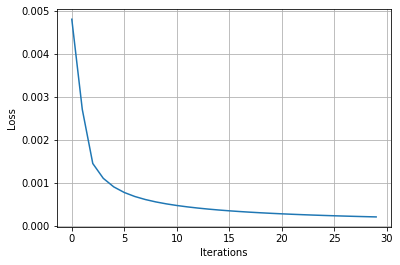

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='constant', eta0=0.01)
scaler = StandardScaler()
pipe = make_pipeline(scaler, log_reg)
loss = []
iterations=30
for i in range(iterations):
  pipe.fit(X_train_69, y_train_69)
  y_pred = pipe.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

D.Use the "invscaling" stratagey for the learning rate with power_t = 1. Fit the model with x_train_69 (without pre-procesing).

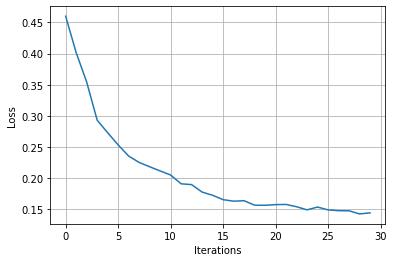

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=1, warm_start=True, learning_rate='invscaling',power_t=1, eta0=0.01)
loss = []
iterations=30
for i in range(iterations):
  log_reg.fit(X_train_69, y_train_69)
  y_pred = log_reg.predict_proba(X_train_69)
  loss.append(log_loss(y_train_69, y_pred))

#plt.figure(figsize=(8,8))
plt.plot(np.arange(iterations), loss)
plt.grid(True)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.show()

Q3) Create the classifier with the following settings

1. No Regularization
2. eta0 = 0.5
3. learning_rate = 'inv_scaling'
4. power_t = 0.5
5. iterations = 10
6. Shuffle = True
7. random_state = 10

Train the classifier with x_train_69. Answer the following questions?

How many false positives (FP) are there in the predictions made on training samples?

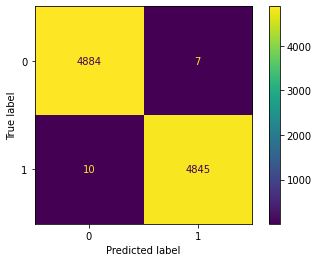

In [ ]:
log_reg = SGDClassifier(loss='log', penalty='None', alpha=0, random_state=10, max_iter=10, shuffle=True, learning_rate='invscaling',power_t=0.5, eta0=0.5)
log_reg.fit(X_train_69, y_train_69)
y_pred = log_reg.predict(X_train_69)
cm_display = ConfusionMatrixDisplay.from_predictions(y_train_69, y_pred)
plt.show()

Q4) Display all the False Positive samples.Could a human recognize them correctly?. Get the index of all FP samples in ascending order. Enter the first index.

In [ ]:
y_train_69_False = np.where(y_train_69==0)
y_pred_True = np.where(y_pred == 1)

np.intersect1d(y_train_69_False, y_pred_True)

array([   0, 2167, 2407, 3036, 3368, 4217, 5556, 6230])

Q5) Load '20newsgroups' data.
* Vectorize the data using TfidfVectorizer. 

Which of the following options represent the shape of the fitted and transformed dataset??

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

In [ ]:
news_text = fetch_20newsgroups()
# print(data)
vectorizer = TfidfVectorizer()
data_transformed = vectorizer.fit_transform(news_text.data)
# data_transformed, label_transformed = model.fit(data.data, data.target)
print(data_transformed.shape)

(11314, 130107)


Q6) Split the data into train and test using train_test_split with test_size = 0.3 and random_state = 0.

Use MultinomialNB to train the model.

Compute test score.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_transformed, news_text.target, test_size=0.3, random_state=0)

multiNB = MultinomialNB()
multiNB.fit(X_train, y_train)

scores = multiNB.score(X_test, y_test)
print(scores)

0.8427098674521355
